In [10]:
import time
import datetime
from datetime import datetime, timedelta
import pandas as pd
from pycoingecko import CoinGeckoAPI
from pathlib import Path

In [11]:
import json
import requests
import hvplot.pandas
import panel as pn
import holoviews as hv
import numpy as np
from sklearn import cluster, covariance, manifold
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import warnings
warnings.filterwarnings('ignore')


In [12]:
cg = CoinGeckoAPI()

pages = 2 # max 250 results per page

markets = []
for p in np.arange(pages):
    market = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=250, page=p, price_change_percentage='24h')
    markets = markets + market
cg_id_list = [m['id'] for m in markets]
len(cg_id_list)

500

In [13]:
cg_id_list = [
    'spell-token',
    'illuvium',
    'star-atlas',
    'rainicorn',
    'only1',
    'insurace',
    'polyswarm',
    'hackenai',
    'forefront',
    'solanium',
    'mercurial',
    'saber',
    'solfarm',
    'bitcoin',
    'ethereum',
    'solana',
    'polkadot',
    'cardano',
    'dogecoin',
    'terra-luna',
    'avalanche-2',
    'shiba-inu',
    'litecoin',
    'bitcoin-cash',
    'cosmos',
    'matic-network',
 'filecoin',
 'stellar',
 'internet-computer',
 'vechain',
 'axie-infinity',
    'thorchain',
 'sushi',
 'compound-governance-token',
    'monero',
    'fantom',
    'algorand',
    'tezos',
    'near',
    'waves',
    'harmony',
    'zilliqa',
    'flow',
    'flux',
    'metis',
    'moonriver',
    'chainlink',
    'band-protocol',
    'huobi-token',
 'dydx',
 'yearn-finance',
 'bitcoin-gold',
 'mina-protocol',
 'curve-dao-token',
     'augur',
    'api3',
    'dia-data',
    'umbrella-network',
    'uniswap',
    'raydium',
    'orca',
    'joe',
    'quick',
    'anyswap',
    'antimatter',
    '1inch',
    'aave',
    'maker',
    'lido-dao',
    'serum',
    'audius',
    'arweave',
    'bonfida',
    'yield-guild-games'
    
]
len(cg_id_list)

74

In [14]:
cg = CoinGeckoAPI()
period = 365 * 1 # 1 year
price_dict = {}

markets  = pd.DataFrame()

time_end = datetime.now()
time_start = time_end - timedelta(days=period)
unixtime_start = int(time.mktime(time_start.timetuple()))
unixtime_end = int(time.mktime(time_end.timetuple()))
for token in cg_id_list:
    token_data = cg.get_coin_market_chart_range_by_id(id=token, vs_currency='usd',
                                                      from_timestamp=unixtime_start, to_timestamp=unixtime_end)
    s_time = time.time()
    
    df = pd.DataFrame()
    df['date'] = [t[0] for t in token_data['prices']]
    df[f'{token}'] = [t[1] for t in token_data['market_caps']]
    
    if len(markets) == 0:
        markets['date'] = [t[0] for t in token_data['prices']]
        markets[f'{token}'] = [t[1] for t in token_data['market_caps']]
    else:
        markets = markets.merge(df, on='date', how='outer')
    
    e_time = time.time()
    while e_time - s_time <= 1.2:  # Limit of 50 calls per minute (60/50 = 1.2)
        e_time = time.time()
        pass
    



In [ ]:
#markets.head()

In [ ]:
df = markets.copy()
df['date']=pd.to_datetime(df['date'], unit = 'ms')
df.head()

In [ ]:
df = df.set_index('date', drop=True)

dp_markets_df = df.pct_change()
dp_markets_df = dp_markets_df.dropna(axis=0, how='all')
dp_markets_df = dp_markets_df.dropna(axis=1)
dp_markets_df.head()

In [ ]:
# Load data CSV for presentation
dp_markets_df = pd.read_csv(
    Path('crypto_market_caps.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)
dp_markets_df.head()


,spell-token,illuvium,polyswarm,hackenai,mercurial,bitcoin,ethereum,solana,polkadot,cardano,...,uniswap,antimatter,1inch,aave,maker,lido-dao,serum,audius,arweave,bonfida
date,,,,,,,,,,,,,,,,,,,,,
2021-05-29,0.000000,-0.087474,-0.084921,-0.178955,-0.069173,-0.075526,-0.116392,-0.141745,-0.110146,-0.081747,...,-0.086776,-0.107659,-0.161449,-0.144139,-0.127478,-0.204751,-0.148758,-0.141004,-0.074100,-0.154125
2021-05-30,0.231838,-0.029180,-0.077416,-0.050995,-0.020782,-0.021363,-0.048031,-0.045486,-0.063362,-0.056490,...,-0.101236,-0.070963,-0.058184,-0.062235,-0.049803,-0.049462,-0.048317,-0.080900,-0.092101,-0.066768
2021-05-31,0.238859,0.067797,0.092618,-0.037861,0.022546,0.022048,0.035723,0.030508,0.015360,0.099605,...,0.095878,0.008402,0.111175,0.081288,0.070708,0.119675,0.043991,0.033885,0.081935,0.058975
2021-06-01,-0.059507,0.106957,0.026690,-0.004131,-0.004840,0.045575,0.130062,0.145793,0.143006,0.109167,...,0.102625,0.202528,0.106781,0.178813,0.082806,0.195291,0.104627,0.063740,0.081550,0.123031
2021-06-02,-0.205798,-0.007821,-0.032677,0.333030,-0.024114,-0.014893,-0.025359,-0.050999,-0.015254,0.000810,...,-0.030430,-0.194083,-0.023898,-0.023796,0.002862,-0.057441,-0.031295,0.050371,0.002730,-0.042151


In [ ]:
variation = dp_markets_df
variation.shape

(364, 52)

In [ ]:
#We use sparse inverse covariance estimation to find which close prices are correlated conditionally on the others
edge_model = covariance.GraphicalLassoCV(verbose=True)
X = variation.copy()
X /= X.std(axis=0)
edge_model.fit(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   2s
[GraphicalLassoCV] Done refinement  4 out of 4:   2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


GraphicalLassoCV(verbose=True)

In [8]:
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()
names=[]
for stock in dp_markets_df.columns.tolist():
    names.append(stock)
names = np.array(names)
for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: spell-token
Cluster 2: illuvium
Cluster 3: polyswarm
Cluster 4: hackenai
Cluster 5: mercurial, ethereum, cardano, dogecoin, avalanche-2, cosmos, matic-network, vechain, axie-infinity, thorchain, compound-governance-token, fantom, algorand, tezos, waves, bitcoin-gold, curve-dao-token, aave, maker, serum, bonfida
Cluster 6: solana
Cluster 7: terra-luna, antimatter, arweave
Cluster 8: bitcoin, polkadot, litecoin, bitcoin-cash, stellar, sushi, monero, harmony, zilliqa, chainlink, band-protocol, huobi-token, yearn-finance, augur, dia-data, uniswap
Cluster 9: filecoin
Cluster 10: flow
Cluster 11: flux
Cluster 12: api3
Cluster 13: 1inch
Cluster 14: lido-dao
Cluster 15: audius


In [46]:
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=10)
embedding = node_position_model.fit_transform(X.T).T

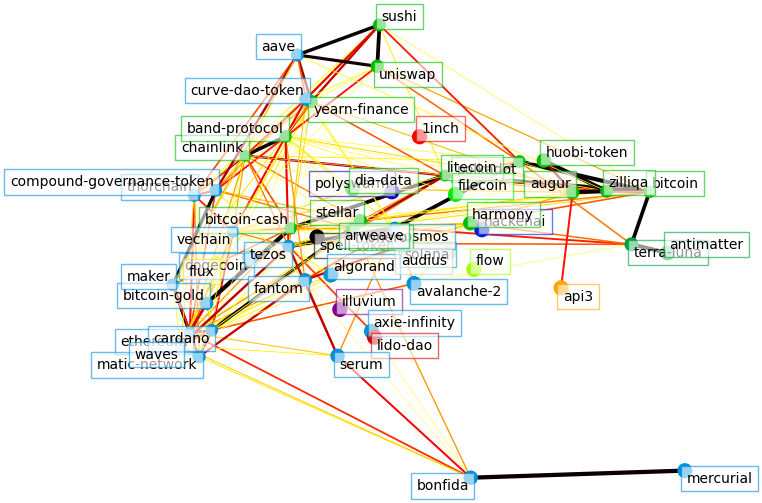

In [47]:
# Plot the DataFrame
# Visualization
plt.figure(1, facecolor='w', figsize=(12, 9))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')


#Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)


# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)

# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)


# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))
plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())
plt.show()